In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scrape import entorb

federal_state_translation = {
    "BB": "Brandenburg",
    "BE": "Berlin",
    "BW": "Baden-Württemberg",
    "BY": "Bayern",
    "HB": "Bremen",
    "HE": "Hessen",
    "HH": "Hamburg",
    "MV": "Mecklenburg-Vorpommern",
    "NI": "Niedersachsen",
    "NW": "Nordrhein-Westfalen",
    "RP": "Rheinland-Pfalz",
    "SH": "Schleswig-Holstein",
    "SL": "Saarland",
    "SN": "Sachsen",
    "ST": "Sachsen-Anhalt",
    "TH": "Thüringen",
    "DE-total": "Deutschland",
}
inv_fst = {v: k for k, v in federal_state_translation.items()}

df = pd \
.read_csv("data/fertility_de.tsv",
          sep="\t",
          usecols=['States', 'Fertilitätsrate pro Frau'])
cpm = []
std = []
for area in df['States']:
    de = entorb.to_dataframe(inv_fst[area])
    cpm.append(de.rolling('7D').mean().last('1D')['Cases_Per_Million'].sum())
df['Cases_Per_Million'] = cpm

In [2]:
df

,States,Fertilitätsrate pro Frau,Cases_Per_Million
0,Brandenburg,1.69,1342.182429
1,Niedersachsen,1.68,1639.911286
2,Sachsen,1.66,1319.446857
3,Bremen,1.63,2379.000143
4,Thüringen,1.63,1493.297429
5,Sachsen-Anhalt,1.62,820.993429
6,Nordrhein-Westfalen,1.61,2241.969857
7,Schleswig-Holstein,1.61,1080.046714
8,Rheinland-Pfalz,1.60,1685.202286
9,Baden-Württemberg,1.59,3182.451143


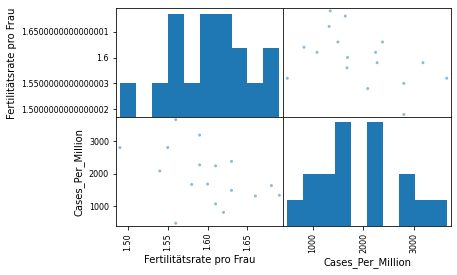

In [3]:
t = pd.plotting.scatter_matrix(df)

In [4]:
corr = df.corr()**2
corr.style.background_gradient(cmap='Blues')

,Fertilitätsrate pro Frau,Cases_Per_Million
Fertilitätsrate pro Frau,1.000000,0.195262
Cases_Per_Million,0.195262,1.000000


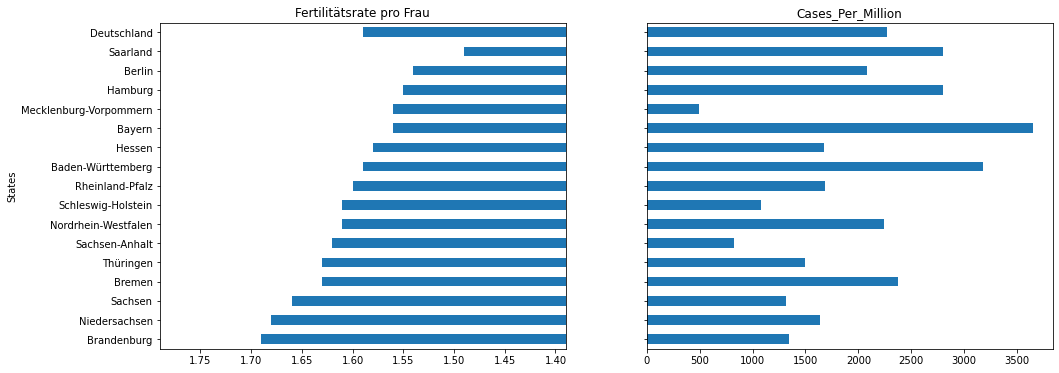

In [5]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(16,6))

ax = df.plot(kind='barh',
             x='States',
             y='Fertilitätsrate pro Frau',
             title='Fertilitätsrate pro Frau',
             legend=False,
             ax=axes[0])
axes[0].set_xlim(df['Fertilitätsrate pro Frau'].max()+0.1, df['Fertilitätsrate pro Frau'].min()-0.1)
df.plot(kind='barh',
        x='States',
        y='Cases_Per_Million',
        title='Cases_Per_Million',
        legend=False,
        ax=axes[1])